In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv("imdb_top_1000.csv")
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
movies = movies.drop(['Poster_Link','Star3','Star4'], axis = 1)
movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,"4,360,000"


In [ ]:
movies.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,NaN
999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,51853,NaN


In [ ]:
movies=movies.dropna()
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Overview       714 non-null    object 
 7   Meta_score     714 non-null    float64
 8   Director       714 non-null    object 
 9   Star1          714 non-null    object 
 10  Star2          714 non-null    object 
 11  No_of_Votes    714 non-null    int64  
 12  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 78.1+ KB


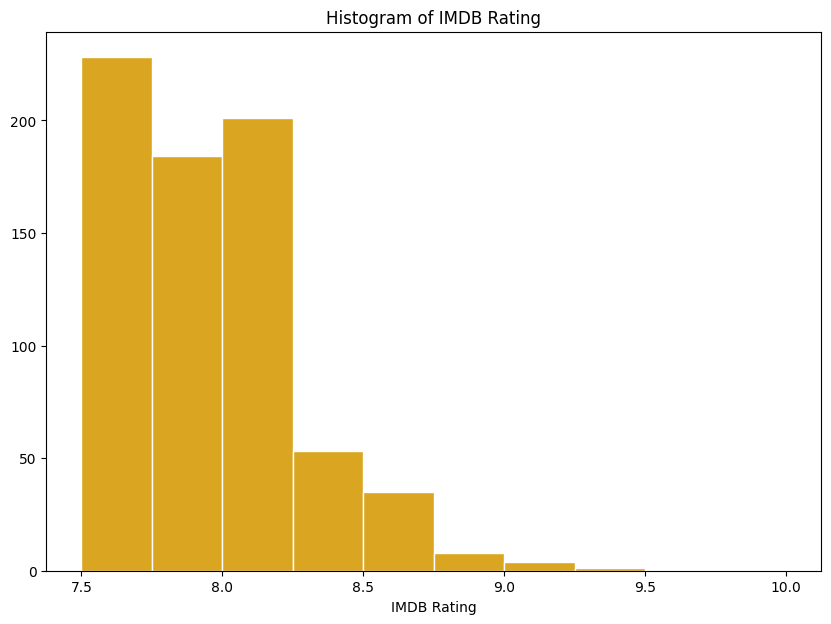

In [ ]:
ratings = movies['IMDB_Rating']
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(ratings, bins = [7.5,7.75,8,8.25,8.50,8.75,9,9.25,9.50,9.75,10], color='goldenrod',edgecolor='white')
plt.title("Histogram of IMDB Rating")
plt.xlabel("IMDB Rating")
plt.show()

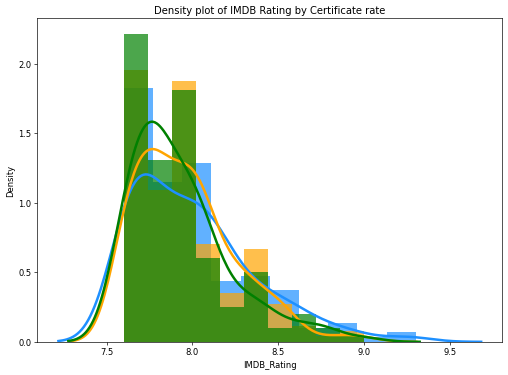

In [ ]:
plt.figure(figsize=(10,7), dpi= 60)
warnings.filterwarnings('ignore')
sns.distplot(movies.loc[movies['Certificate'] == 'A', "IMDB_Rating"], color="dodgerblue", label="A", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(movies.loc[movies['Certificate'] == 'U', "IMDB_Rating"], color="orange", label="U", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(movies.loc[movies['Certificate'] == 'UA', "IMDB_Rating"], color="green", label="UA", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.title('Density plot of IMDB Rating by Certificate rate')
plt.show()

Text(0.5, 1.0, 'Violin plot of IMDB Rating by Certificate rate')

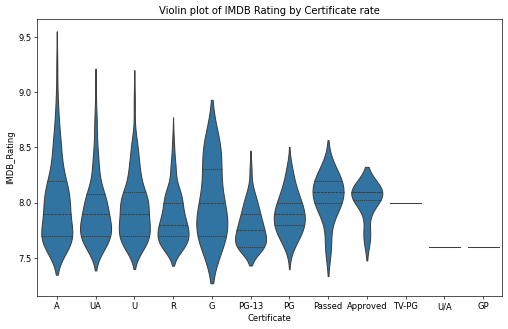

In [ ]:
plt.figure(figsize=(10,6), dpi= 60)
sns.violinplot(x='Certificate', y='IMDB_Rating', data=movies, scale='width', inner='quartile')
plt.title('Violin plot of IMDB Rating by Certificate rate')

Text(0.5, 1.0, 'Scatter plot of IMDB Rating versus Meta score')

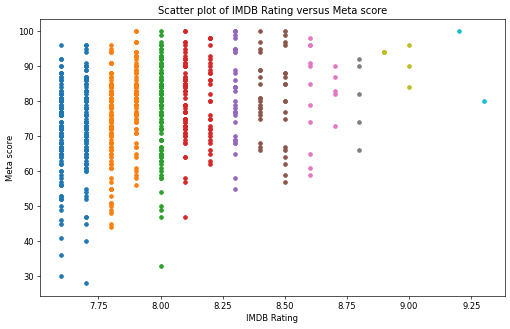

In [ ]:
categories = np.unique(movies['IMDB_Rating'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

plt.figure(figsize=(10, 6), dpi= 60, facecolor='w', edgecolor='k')

for i, IMDB_Rating in enumerate(categories):
    plt.scatter('IMDB_Rating', 'Meta_score',
                data=movies.loc[movies.IMDB_Rating==IMDB_Rating, :],
                s=20, color=colors[i], label=str(IMDB_Rating))

plt.gca().set(xlabel='IMDB Rating', ylabel='Meta score')
plt.title('Scatter plot of IMDB Rating versus Meta score')

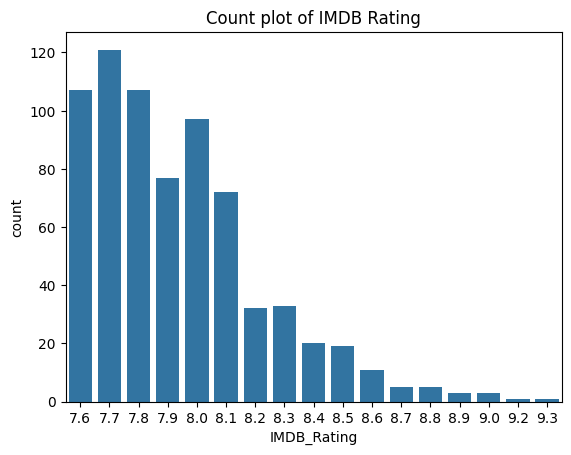

In [ ]:
sns.countplot(x ='IMDB_Rating', data = movies)
plt.title('Count plot of IMDB Rating')
plt.show()

<Axes: >

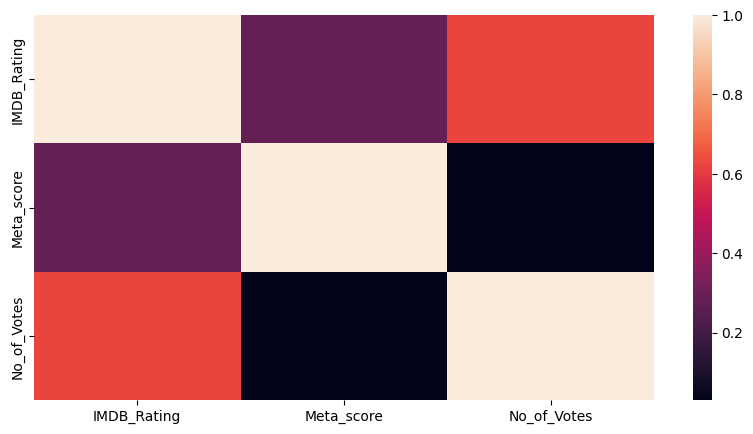

In [ ]:
plt.figure(figsize=(10,5))
c=movies.corr()
sns.heatmap(c)

In [ ]:
movies2 = movies.query("IMDB_Rating >= 8.5")
print("Top 10 movies based on IMDB Rating: \n")
print(movies2[["Series_Title", "IMDB_Rating"]].head(10))

Top 10 movies based on IMDB Rating: 

                                    Series_Title  IMDB_Rating
0                       The Shawshank Redemption          9.3
1                                  The Godfather          9.2
2                                The Dark Knight          9.0
3                         The Godfather: Part II          9.0
4                                   12 Angry Men          9.0
5  The Lord of the Rings: The Return of the King          8.9
6                                   Pulp Fiction          8.9
7                               Schindler's List          8.9
8                                      Inception          8.8
9                                     Fight Club          8.8


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')
tfv_matrix = tfv.fit_transform(movies['Overview'])
print(tfv_matrix)
print(tfv_matrix.shape)

  (0, 691)	0.43082450360678287
  (0, 320)	0.47367559435939394
  (0, 972)	0.31687896038979935
  (0, 94)	0.396214944738192
  (0, 544)	0.3834232224586881
  (0, 431)	0.43082450360678287
  (1, 799)	0.4055023355073973
  (1, 263)	0.5183366101617972
  (1, 28)	0.5425717848667836
  (1, 737)	0.24140998130933994
  (1, 189)	0.46285212936176523
  (2, 313)	0.3246442609933014
  (2, 624)	0.3857985206204127
  (2, 71)	0.41285971160317486
  (2, 368)	0.3979668635185137
  (2, 620)	0.3124759180952004
  (2, 460)	0.41285971160317486
  (2, 475)	0.3857985206204127
  (3, 587)	0.25641738471257697
  (3, 975)	0.25641738471257697
  (3, 586)	0.23325572326459806
  (3, 500)	0.3117903895393268
  (3, 838)	0.3005433562852571
  (3, 299)	0.1876055804025173
  (3, 550)	0.3005433562852571
  :	:
  (711, 176)	0.4195987322081201
  (711, 234)	0.4353010952642876
  (711, 103)	0.28068485013388006
  (711, 863)	0.3035844618328925
  (712, 785)	0.40537706043256766
  (712, 850)	0.3788063252794599
  (712, 106)	0.3788063252794599
  (712, 824

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
print(sig[0])

[0.76202193 0.76159416 0.76159416 0.76159416 0.76159416 0.76164608
 0.76165521 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76163931 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76161953 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76162354 0.76159416 0.76159416 0.76159416 0.76172728
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76163816 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416 0.76159416
 0.76162668 0.76159416 0.76159416 0.76159416 0.76159416 0.7615

In [ ]:
indices = pd.Series(movies.index, index=movies['Series_Title']).drop_duplicates()
print(indices)
print(indices['The Godfather'])
sig[713]
list(enumerate(sig[indices['The Godfather']]))
sorted(list(enumerate(sig[indices['The Godfather']])), key=lambda x: x[1], reverse=True)

Series_Title
The Shawshank Redemption      0
The Godfather                 1
The Dark Knight               2
The Godfather: Part II        3
12 Angry Men                  4
                           ... 
Giù la testa                990
Kelly's Heroes              991
The Jungle Book             992
A Hard Day's Night          994
From Here to Eternity       997
Length: 714, dtype: int64
1


[(1, 0.7620219321070834),
 (694, 0.7617471234041224),
 (501, 0.761730856251692),
 (421, 0.7617128877994734),
 (174, 0.7616992465831054),
 (131, 0.761686863355188),
 (125, 0.7616865214509352),
 (221, 0.7616844311223665),
 (24, 0.7616840255884122),
 (370, 0.7616835705109551),
 (474, 0.7616828475476735),
 (590, 0.7616814066046484),
 (3, 0.7616788721071488),
 (441, 0.7616704813178218),
 (312, 0.7616656113749484),
 (69, 0.7616651180597998),
 (120, 0.7616643796905398),
 (139, 0.7616630390011031),
 (404, 0.7616607353215704),
 (27, 0.7616594219448407),
 (380, 0.7616591450092595),
 (615, 0.7616587471434085),
 (525, 0.761656972249076),
 (247, 0.7616566713422879),
 (413, 0.7616547453178195),
 (453, 0.7616531585826104),
 (232, 0.7616522693300444),
 (578, 0.7616505136113907),
 (548, 0.7616502570774569),
 (113, 0.7616490750019124),
 (209, 0.761648965803978),
 (621, 0.7616470850455016),
 (16, 0.7616458266442145),
 (48, 0.7616450593086773),
 (701, 0.7616446773932594),
 (609, 0.7616445360495196),
 (15,

In [ ]:
def recommend(Series_Title, sig=sig):
    # Get the index corresponding to original_title
    indx = indices[Series_Title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[indx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies['Series_Title'].iloc[movie_indices]

In [ ]:
print("Recommended movies: ")
print(recommend('The Godfather'))

Recommended movies: 
974                The Godfather: Part III
739                               Nebraska
628    The Curious Case of Benjamin Button
255                                  Fargo
190                          All About Eve
172                                    Ran
346                      The King's Speech
26                         La vita è bella
543                         The Wild Bunch
689                      Kramer vs. Kramer
Name: Series_Title, dtype: object
